In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc

In [10]:
data = pd.read_csv('bank.csv')

In [11]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [13]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [14]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [16]:
data.duplicated().sum()

0

In [18]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [23]:
df = pd.DataFrame(data)

<AxesSubplot:>

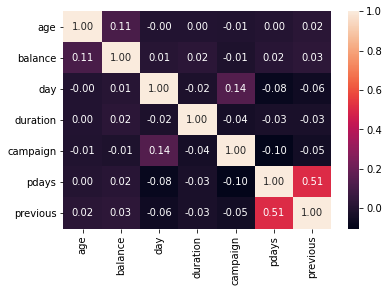

In [29]:
sns.heatmap(df[['age','balance','day','duration','campaign','pdays','previous']].corr(), annot = True, fmt = '.2f')

In [33]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [32]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [38]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    
    return res_df

In [39]:
encoded_data = preprocessor(df)
encoded_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [76]:
x = encoded_data.drop(['deposit'],axis =1)
y = encoded_data['deposit']

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,test_size = 0.2,random_state=46)

In [78]:
# Decision Tree Classifier with max_depth 2

model_dt_2 = DecisionTreeClassifier(random_state = 1, max_depth = 2)

model_dt_2.fit(x_train,y_train)

training_score = model_dt_2.score(x_train,y_train)
print(f'training_score : {training_score}')

testing_score = model_dt_2.score(x_test,y_test)
print(f'testing_score : {testing_score}')

training_score : 0.7087019823048494
testing_score : 0.7151813703537842


In [79]:
# Decision Tree Classifier with max_depth 4

model_dt_4 = DecisionTreeClassifier(random_state = 1, max_depth = 4)

model_dt_4.fit(x_train,y_train)

training_score = model_dt_4.score(x_train,y_train)
print(f'training_score : {training_score}')

testing_score = model_dt_4.score(x_test,y_test)
print(f'testing_score : {testing_score}')

training_score : 0.7896740956434091
testing_score : 0.7828034034930587


In [80]:
# Decision Tree Classifier with max_depth 6

model_dt_6 = DecisionTreeClassifier(random_state = 1, max_depth = 6)

model_dt_6.fit(x_train,y_train)

training_score = model_dt_6.score(x_train,y_train)
print(f'training_score : {training_score}')

testing_score = model_dt_6.score(x_test,y_test)
print(f'testing_score : {testing_score}')

training_score : 0.8194646656960466
testing_score : 0.8016121809225257


In [81]:
# Decision Tree Classifier with max_depth 8

model_dt_8 = DecisionTreeClassifier(random_state = 1, max_depth = 8)

model_dt_8.fit(x_train,y_train)

training_score = model_dt_8.score(x_train,y_train)
print(f'training_score : {training_score}')

testing_score = model_dt_8.score(x_test,y_test)
print(f'testing_score : {testing_score}')

training_score : 0.8624706014111323
testing_score : 0.8190774742498881


In [82]:
model_dt = DecisionTreeClassifier(random_state = 1, max_depth = 4, criterion='entropy')

model_dt.fit(x_train,y_train)
            
training_score = model_dt.score(x_train,y_train)
print(f'training_score : {training_score}')

testing_score = model_dt.score(x_test,y_test)
print(f'testing_score : {testing_score}')

training_score : 0.7835143913092172
testing_score : 0.7778772951186744


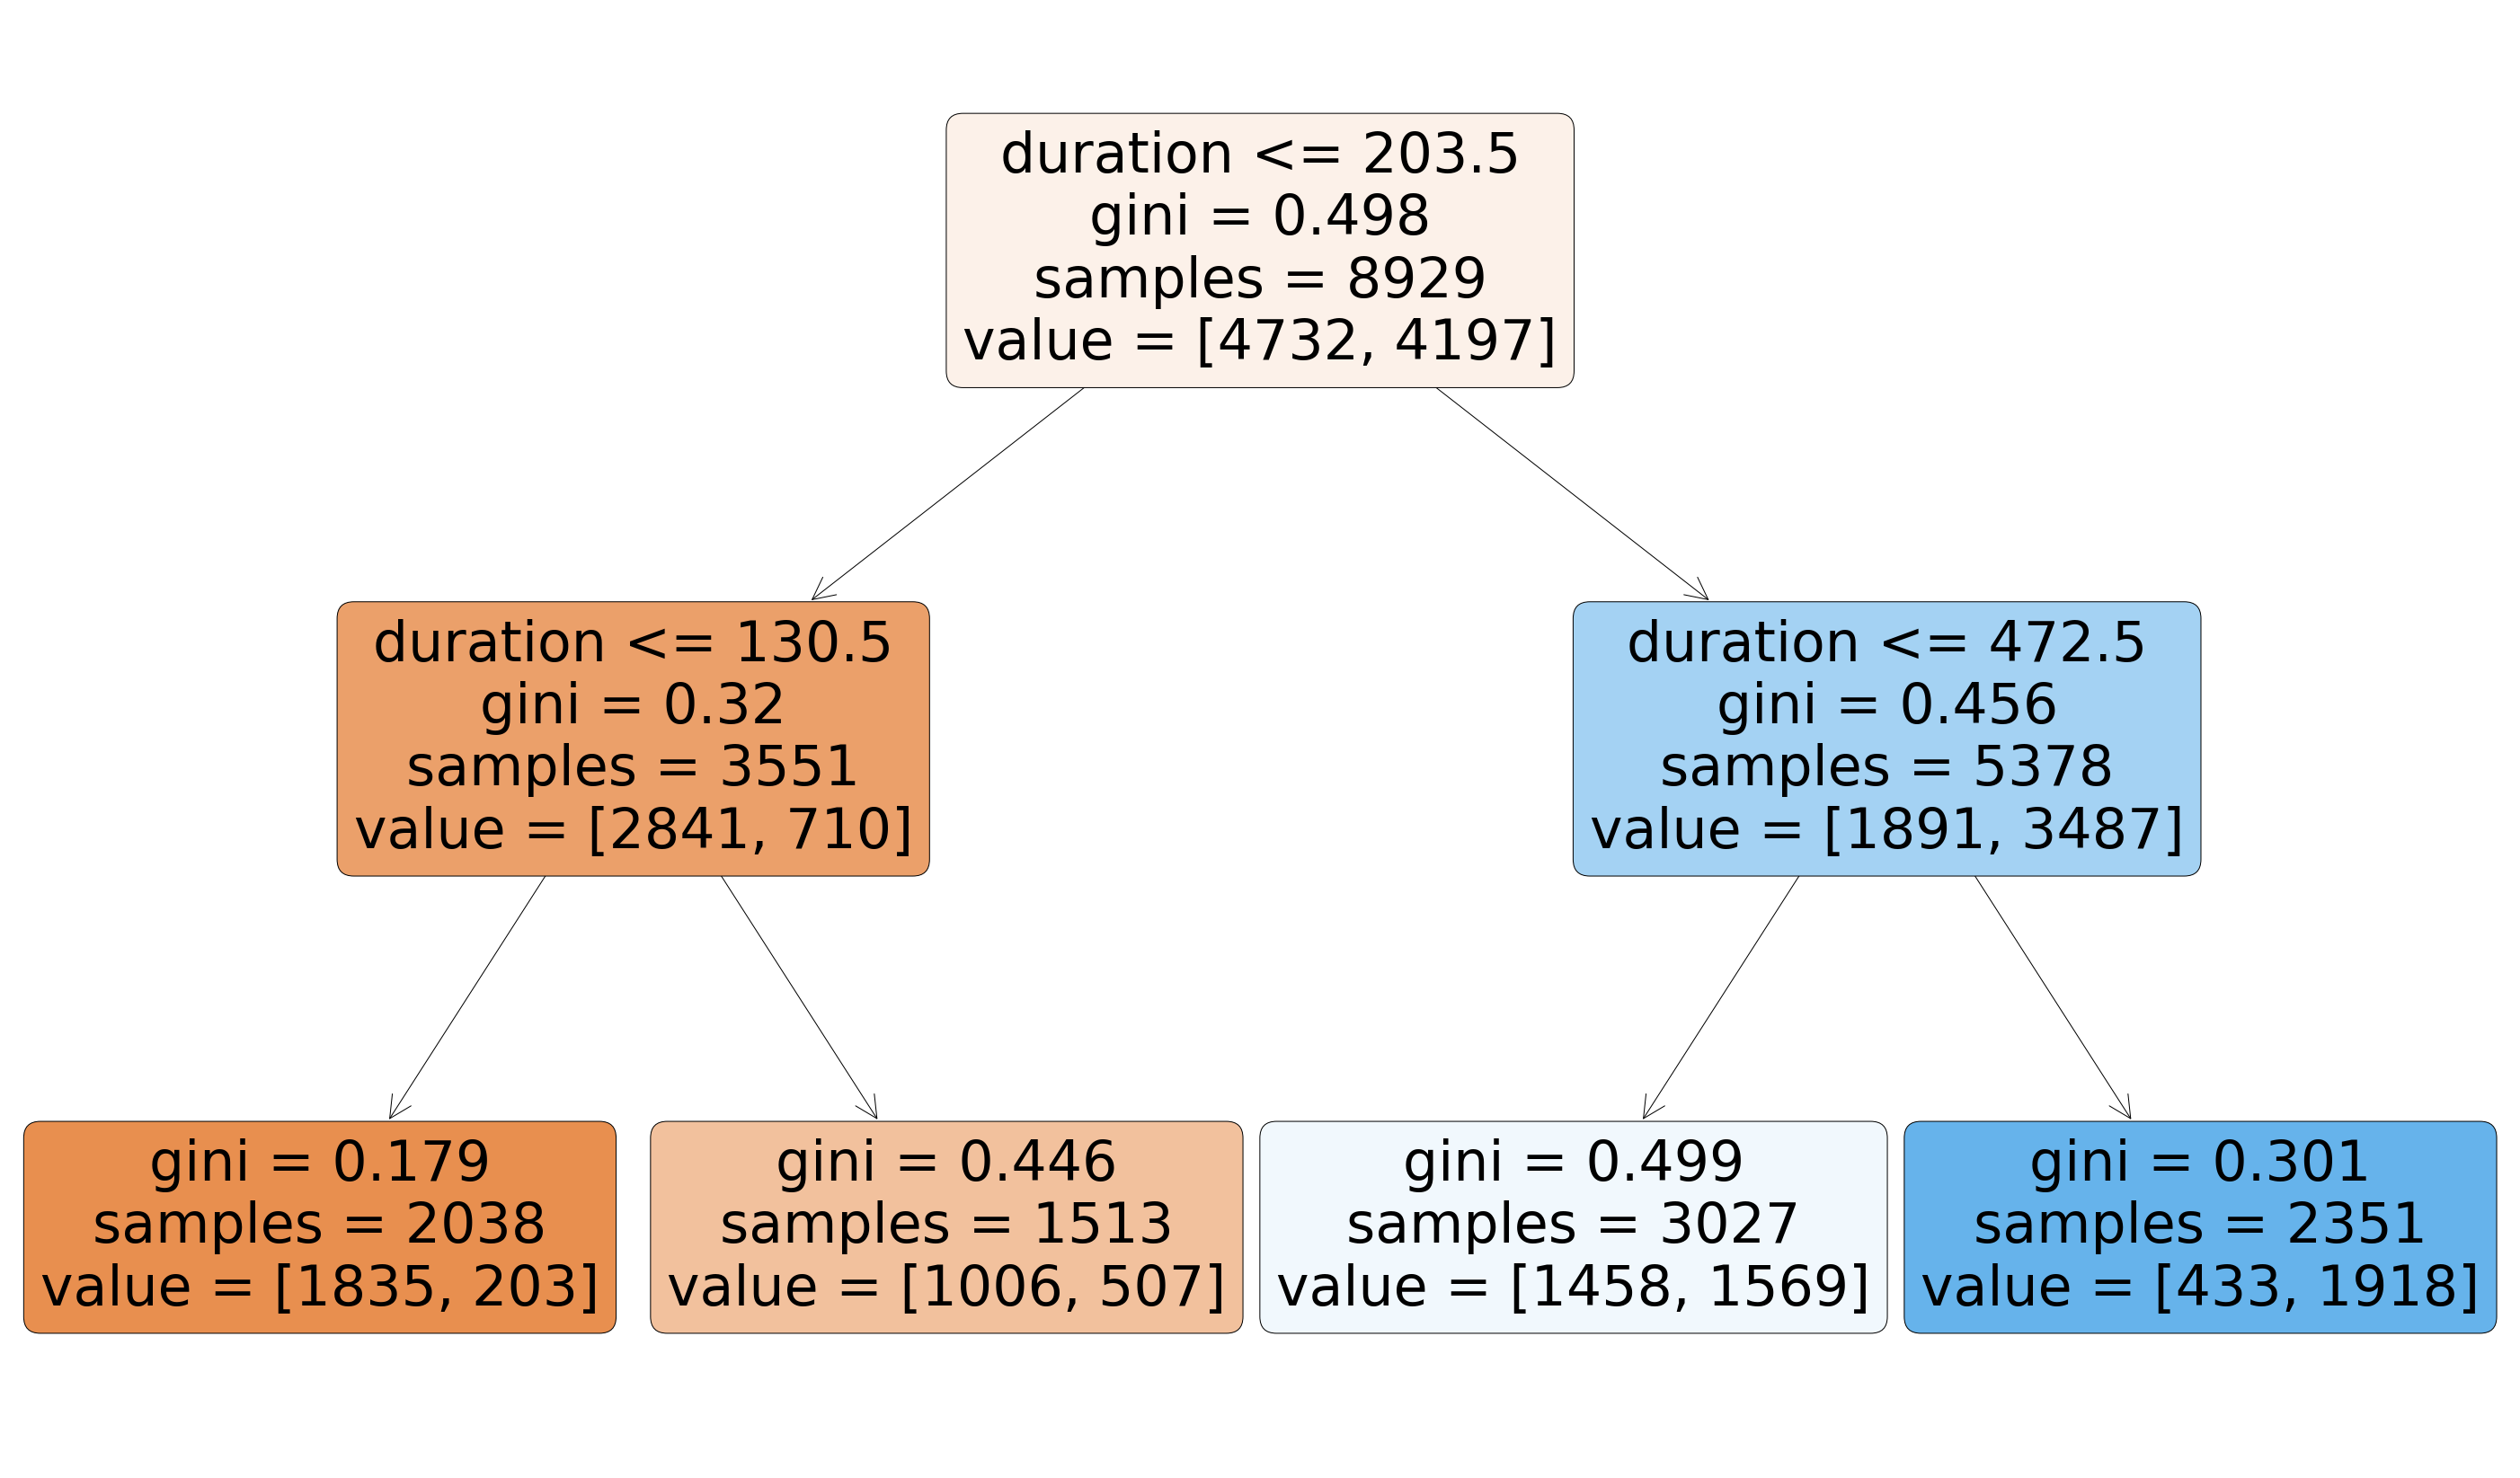

In [85]:
plt.figure(figsize=(50,30))
plot_tree(model_dt_2, feature_names = df.columns, filled = True, rounded= True)
plt.show()

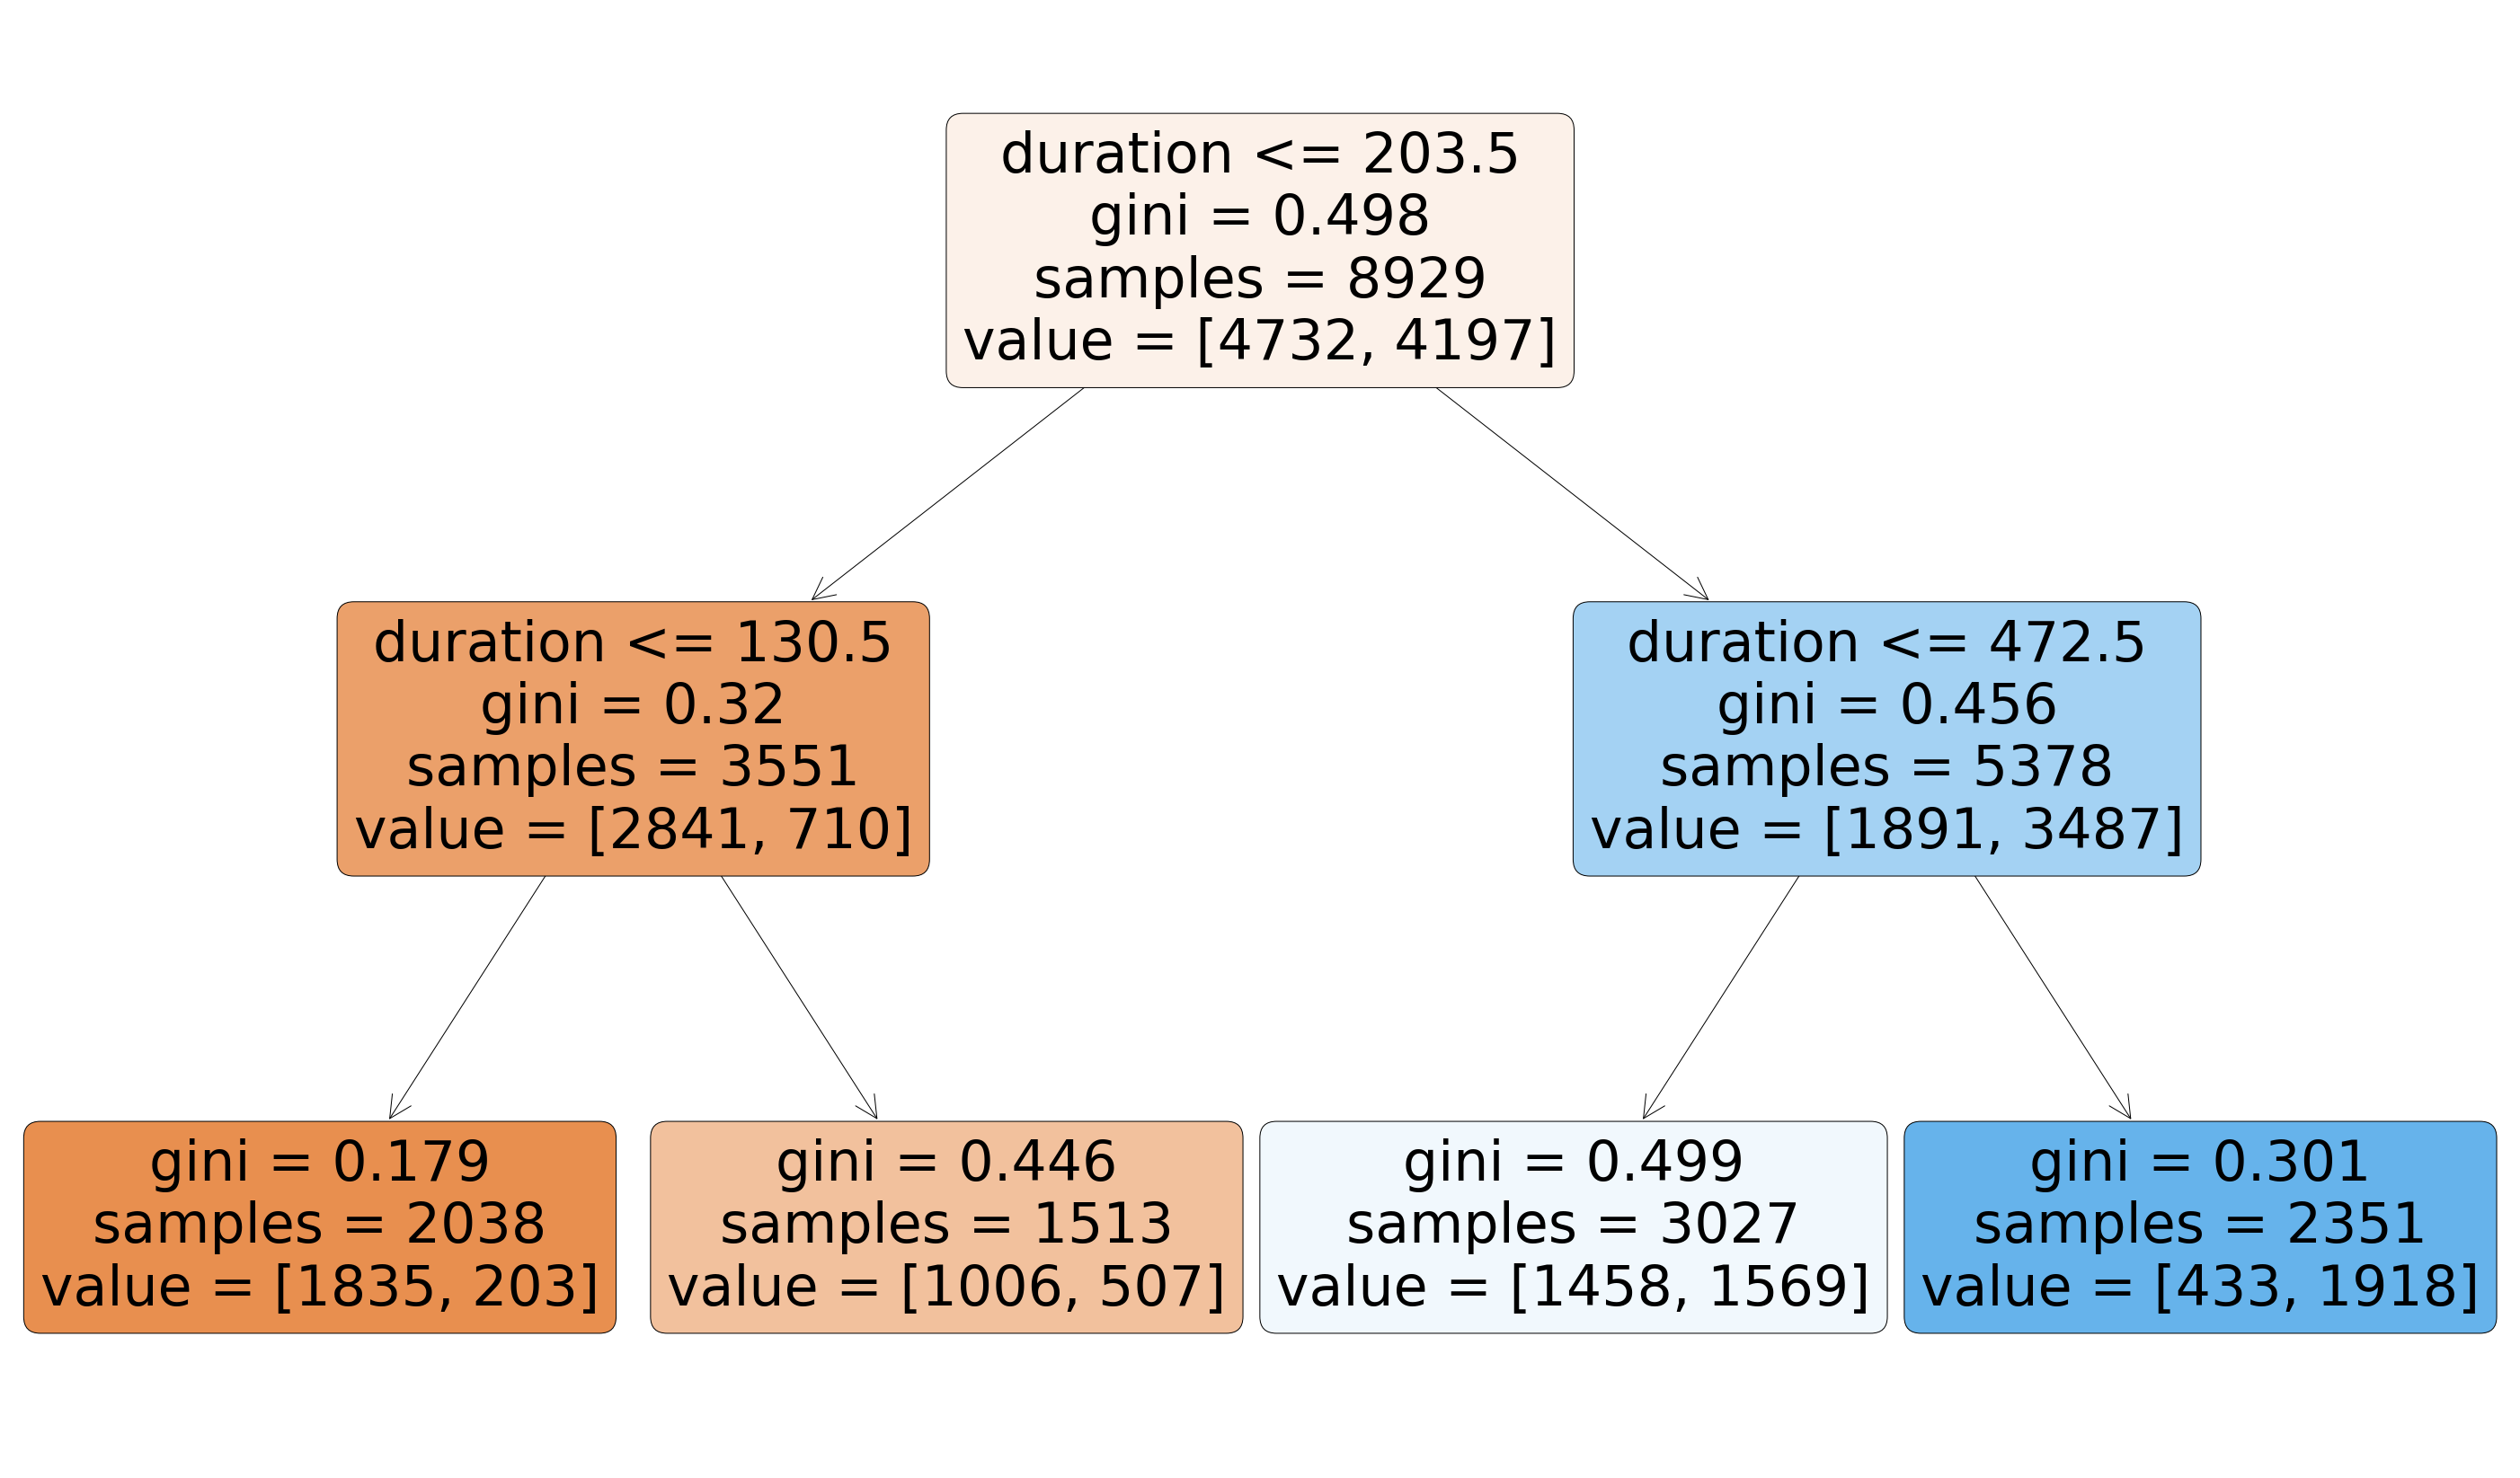

In [84]:
# Plot the decision tree
plt.figure(figsize=(50,30))  # Adjust size for better readability
plot_tree(model_dt_2, feature_names=df.columns,filled=True, rounded=True)
plt.show()

In [87]:
y_pred_prob = model_dt.predict_proba(x_test)[:,1]

In [92]:
fpr, tpr , _ = roc_curve(y_test,y_pred_prob)
roc_auc = auc(fpr,tpr)
roc_auc

0.8462084220191144

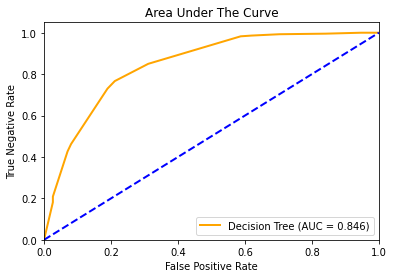

In [111]:
plt.figure(1)
lw = 2

plt.plot(fpr,tpr,color = 'orange',lw =lw,label = f'Decision Tree (AUC = {round(roc_auc,3)})')

plt.plot([0,1],[0,1], color = 'blue',lw =lw, linestyle = '--')

plt.xlim(0.0,1.0)
plt.ylim(0.0,1.05)

plt.xlabel('False Positive Rate')
plt.ylabel('True Negative Rate')
plt.title('Area Under The Curve')
plt.legend(loc="lower right")

plt.show() 

In [115]:
# confusion matrix

y_test_pred = model_dt.predict(x_test)
conf_matrix = confusion_matrix(y_test,y_test_pred)
conf_matrix

array([[900, 241],
       [255, 837]], dtype=int64)

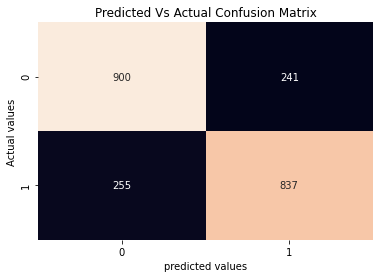

In [122]:
sns.heatmap(conf_matrix , annot = True , fmt = 'd' , cbar = False)
plt.xlabel("predicted values")
plt.ylabel("Actual values")
plt.title("Predicted Vs Actual Confusion Matrix")
plt.show()

In [123]:
accuracy_score(y_test,y_test_pred)

0.7778772951186744